In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 活性化関数: ステップ関数

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(int)

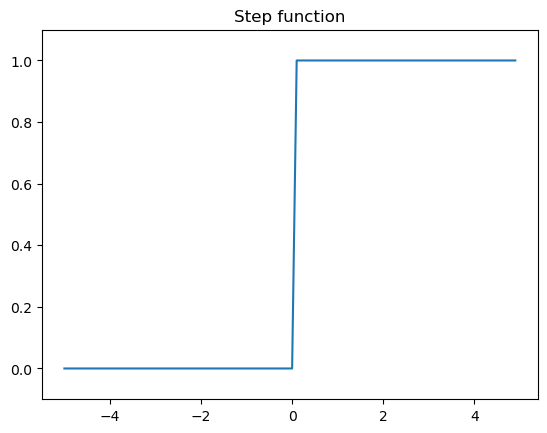

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("Step function")
plt.show()

### 活性化関数: シグモイド関数

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

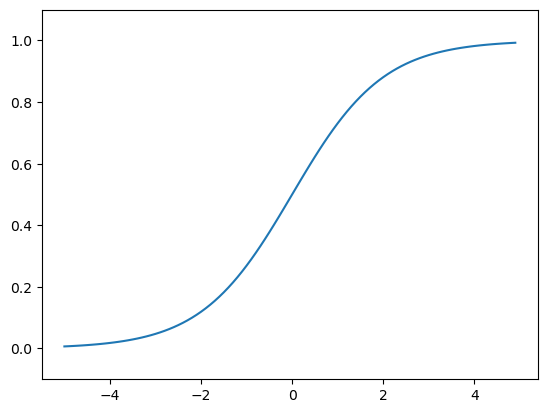

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 活性化関数: ReLU(Rectified Linear Unit)

In [6]:
def relu(x):
    return np.maximum(x, 0)

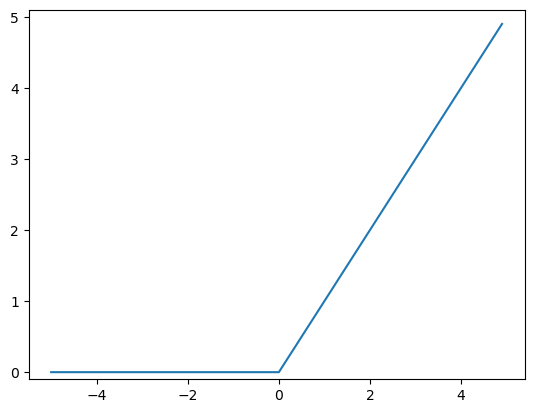

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5.1)
plt.show()

In [8]:
B = np.array([[1, 2], [3, 4], [5, 6]])
np.ndim(B)

2

In [9]:
B.shape

(3, 2)

In [10]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

In [12]:
print(np.dot(A, B))

[[19 22]
 [43 50]]


In [13]:
X = np.array([1, 2])
X.shape

(2,)

In [14]:
W = np.array([[1, 3, 5], [2 ,4, 6]])
W.shape

(2, 3)

In [16]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [17]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [18]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
W2 = np.array([[0.1, 0.3], [0.2, 0.4], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [20]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [21]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [22]:
def init_network():
    network = {
        'W1': np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]),
        'b1': np.array([0.1, 0.2, 0.3]),
        'W2': np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]),
        'b2': np.array([0.1, 0.2]),
        'W3': np.array([[0.1, 0.3], [0.2, 0.4]]),
        'b3': np.array([0.1, 0.2])
    }
    return network

In [23]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [24]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 出力層の関数: ソフトマックス関数

In [26]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [27]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [28]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/var/folders/q2/26hd9b793810ts_x2wb89wbc0000gn/T/ipykernel_94052/518197229.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
/var/folders/q2/26hd9b793810ts_x2wb89wbc0000gn/T/ipykernel_94052/518197229.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [29]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [30]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [32]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [34]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [35]:
np.sum(y)

1.0

## 手描き文字認識

In [37]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [38]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [39]:
from PIL import Image

In [40]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


In [41]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [43]:
print(img.shape)

(784,)


In [44]:
img = img.reshape(28, 28)
print(img.shape)

(28, 28)


In [45]:
img_show(img)

In [47]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [50]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

Accuracy: 0.9352


In [52]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print(f"Accuracy: {float(accuracy_cnt) / len(x)}")

Accuracy: 0.9352
